### Outlier Handling

ide:
- (harusnya) interpolasi tapi gapaham :)
- IQR method sabi jg

In [28]:
import pandas as pd
import numpy as np
import warnings

In [15]:
df_train = pd.read_csv('./dataset/train_done.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])

df_test = pd.read_csv('./dataset/test_cleaned.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])

In [16]:
df_train.describe()

,datetime,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,3.418800e+05,341880.0,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.00000
mean,8.993790e+08,28800.0,28.296996,26.056234,31.092778,27.483902,29.359565,1070.965439,94.221361,1.474545,210.867372,0.370134,85.44976
std,3.552926e+08,0.0,13.325830,12.080483,15.228520,12.924432,13.802332,494.701076,44.888444,1.100903,147.667380,0.941208,22.80106
min,2.839968e+08,28800.0,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,29.000000,0.010000,0.000000,0.000000,0.00000
25%,5.916879e+08,28800.0,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,83.000000,0.880000,149.000000,0.000000,81.00000
50%,8.993790e+08,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,92.000000,1.270000,203.000000,0.000000,97.00000
75%,1.207070e+09,28800.0,28.390000,25.240000,33.370000,27.640000,29.310000,1011.000000,96.000000,1.800000,279.000000,0.250000,100.00000
max,1.514761e+09,28800.0,177.260000,141.590000,202.710000,162.920000,187.170000,5115.510000,503.000000,23.240000,1810.800000,27.100000,100.00000


## Coba pake quartile method dlu bang

In [18]:
#Outlier Detection and Replacement (Quantile and Median Method)

df_train_columns_outlier_handle = ['temp',
 'd_point',
 'feels',
 'min_temp',
 'max_temp',
 'prssr',
 'hum',
 'wind_spd',
 'wind_deg',
 'rain_1h',
 'clouds']

df_outhand = df_train.copy()

for columnName in df_train_columns_outlier_handle:
  #detecting outliers (1.5 below/above)
  Q1 = df_outhand[columnName].quantile(0.25)
  Q3 = df_outhand[columnName].quantile(0.75)
  # print(Q1, Q3)
  IQR = Q3-Q1
  # print(IQR)
  lwr_bound = Q1-(1.5*IQR)
  upr_bound = Q3+(1.5*IQR)

  #replace with median 
  median = np.median(df_outhand[columnName])

  df_outhand.loc[(df_outhand[columnName] < lwr_bound) | (df_outhand[columnName] > upr_bound), columnName] = median

In [19]:
df_outhand.describe()

,datetime,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,3.418800e+05,341880.0,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000
mean,8.993790e+08,28800.0,26.665386,24.583621,29.280177,25.910836,27.662932,1009.959167,89.335834,1.323706,198.993708,0.061318,93.192582
std,3.552926e+08,0.0,2.142392,0.900591,4.314831,2.099053,2.166907,1.727914,8.618333,0.630423,95.186167,0.127849,10.779802
min,2.839968e+08,28800.0,21.550000,22.020000,22.350000,19.220000,22.370000,1006.000000,64.000000,0.010000,0.000000,0.000000,53.000000
25%,5.916879e+08,28800.0,24.980000,23.970000,25.990000,24.250000,25.970000,1009.000000,84.000000,0.880000,149.000000,0.000000,93.000000
50%,8.993790e+08,28800.0,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,92.000000,1.270000,203.000000,0.000000,97.000000
75%,1.207070e+09,28800.0,28.190000,25.180000,33.060000,27.470000,29.100000,1011.000000,96.000000,1.680000,274.000000,0.000000,100.000000
max,1.514761e+09,28800.0,33.500000,27.170000,41.520000,32.720000,34.320000,1014.000000,100.000000,3.180000,472.820000,0.620000,100.000000


## Cek Histogram before-after

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline

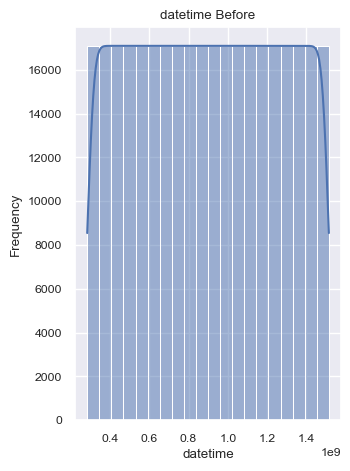

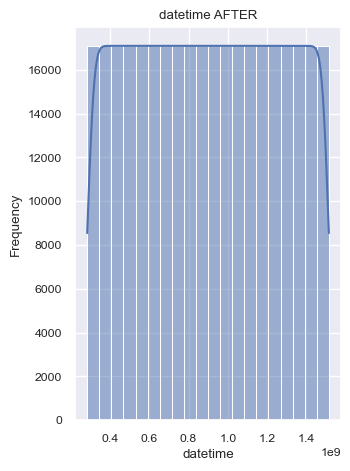

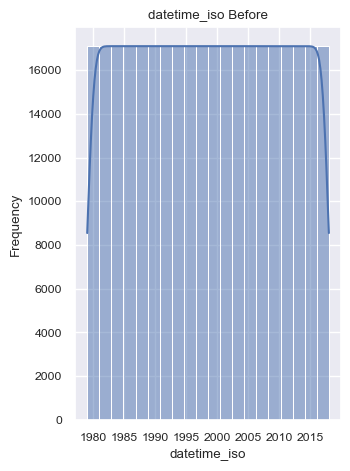

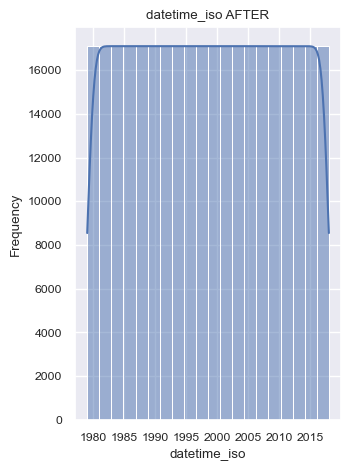

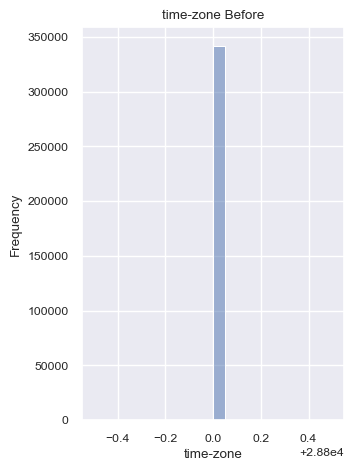

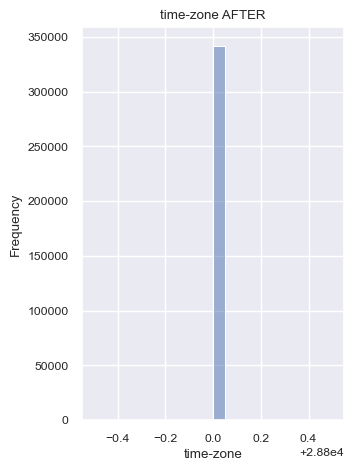

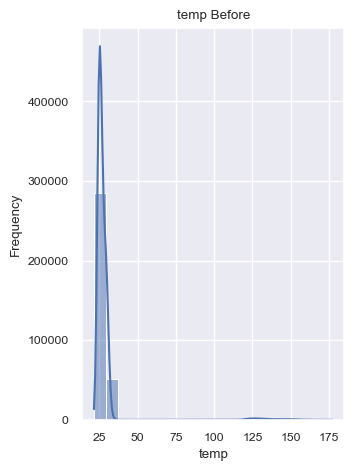

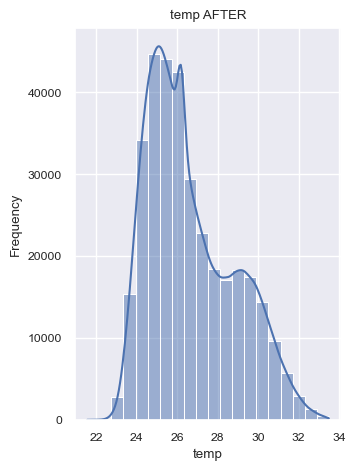

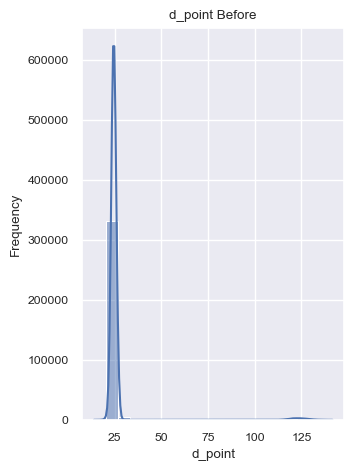

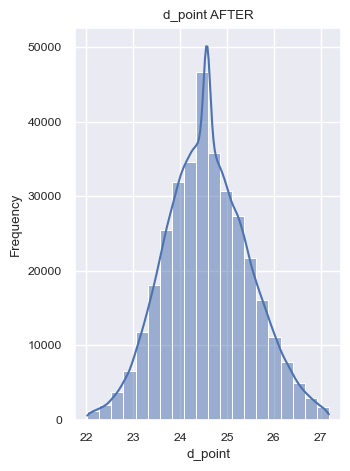

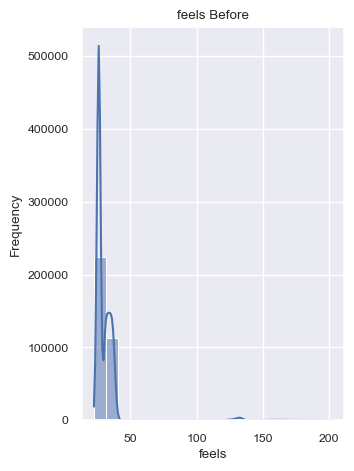

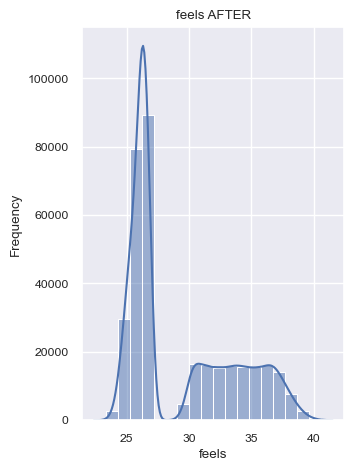

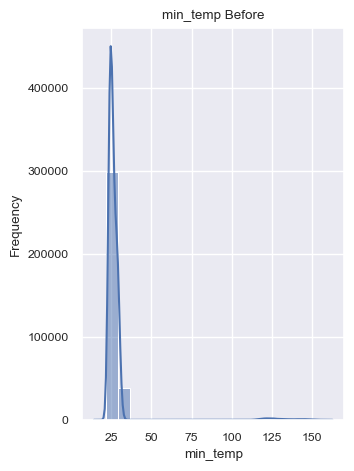

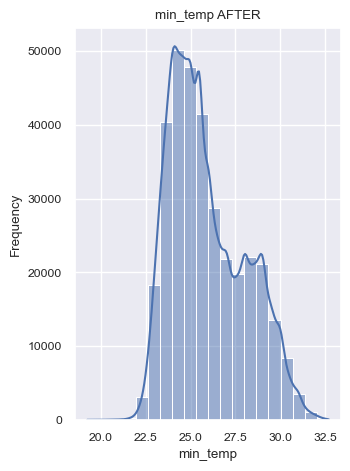

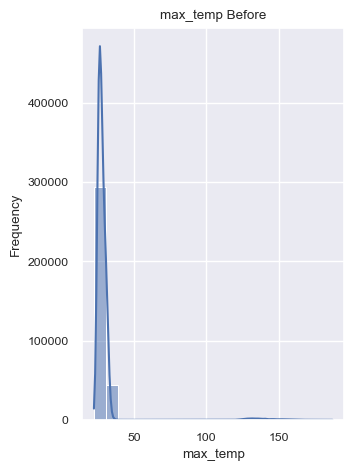

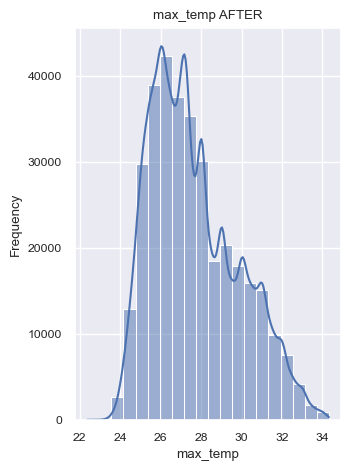

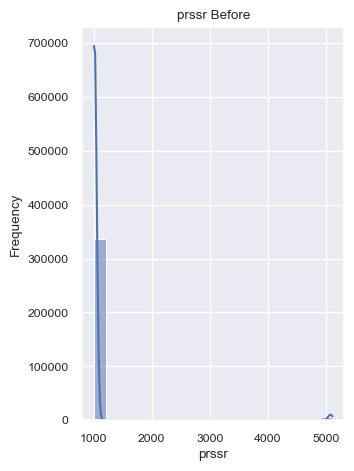

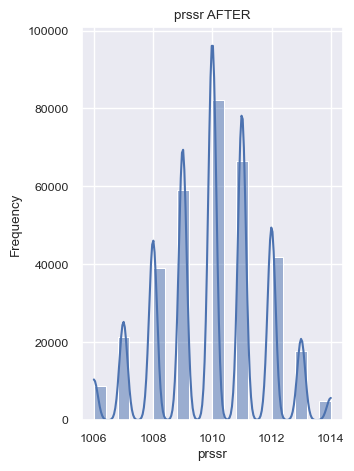

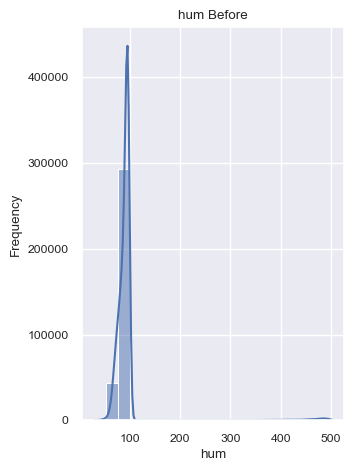

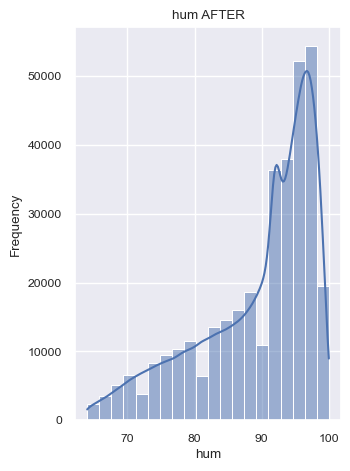

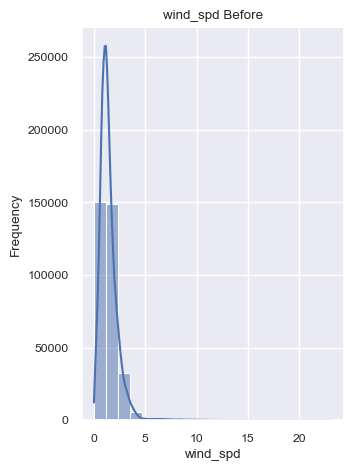

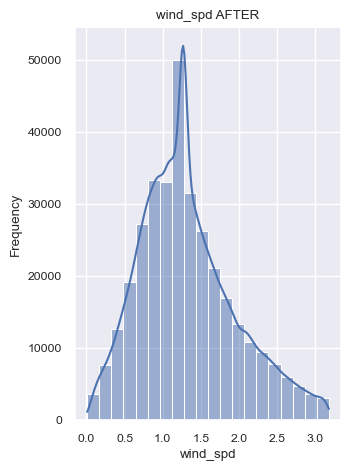

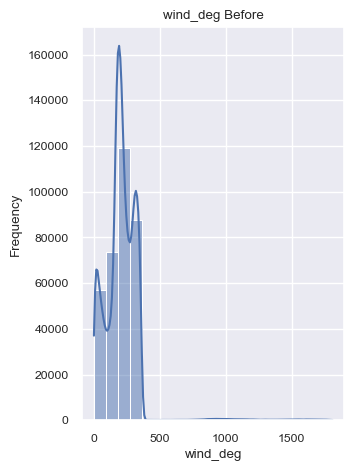

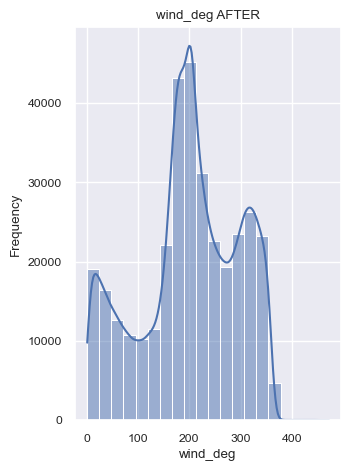

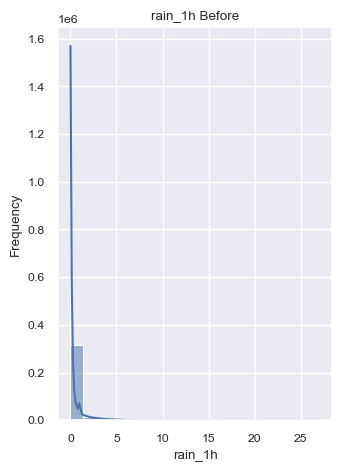

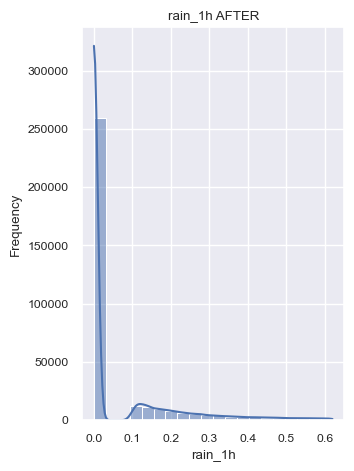

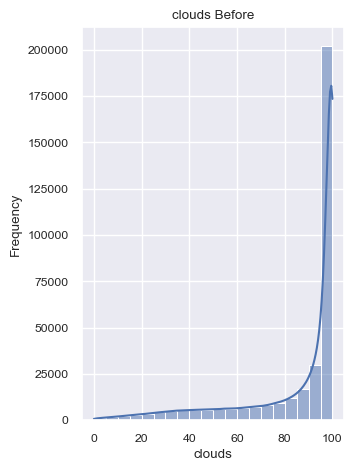

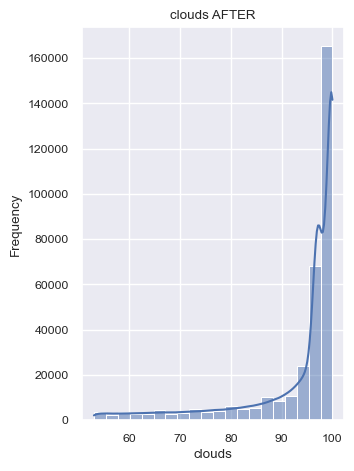

KeyboardInterrupt: 

In [43]:
for column in df_train.columns:
    plt.subplot(1, 2, 1)  # Create the first subplot
    sns.histplot(df_train[column], bins=20, kde=True)  # Adjust the column name and number of bins as needed
    plt.title(f'{column} Before')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    plt.subplot(1, 2, 2)  # Create the second subplot
    sns.histplot(df_outhand[column], bins=20, kde=True)  # Adjust the column name and number of bins as needed
    plt.title(f'{column} AFTER')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()